In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#import sklearn models
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, roc_curve, confusion_matrix
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
#import the dataset
df=pd.read_csv("D:\CHURN PROJECT\PROJECT1\churn-buster-main\Data\cleaned_data.csv")

In [4]:
df.head()

,Unnamed: 0,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,0,KS,128,415,382-4657,False,True,25,265.1,110,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,1,OH,107,415,371-7191,False,True,26,161.6,123,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,2,NJ,137,415,358-1921,False,False,0,243.4,114,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,3,OH,84,408,375-9999,True,False,0,299.4,71,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,4,OK,75,415,330-6626,True,False,0,166.7,113,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [5]:
df["state"] = pd.to_numeric(df["state"], errors='coerce', downcast="float")

In [6]:
df['state'] = df['state'].astype('float64')

In [7]:
df['state'].fillna(0, inplace=True)

In [8]:
print(df.dtypes)

Unnamed: 0                  int64
state                     float64
account length              int64
area code                   int64
phone number               object
international plan           bool
voice mail plan              bool
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object


In [9]:
#building a machine learning model
X = df.drop(columns=["churn","phone number"])
y = df['churn']

#test size is 20% and train size is 80%
from sklearn.model_selection import train_test_split,cross_val_score,cross_val_predict
from sklearn.metrics import accuracy_score
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=7)

# Decision tree 

In [10]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state = 13)
model.fit(X_train, y_train)
predicted = model.predict(X_test)
print("Accuracy Score: ", accuracy_score(y_test,predicted)*100,"%")

Accuracy Score:  91.00449775112443 %


# Random Forest

In [11]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(X_train, y_train)
predicted=rfc.predict(X_test)
print("Accuracy Score: ", accuracy_score(y_test,predicted)*100,"%")

Accuracy Score:  94.75262368815592 %


# Support Vector Machine

In [12]:
from sklearn import svm
svm=svm.SVC()
svm.fit(X_train,y_train)
predicted=svm.predict(X_test)
print("Accuracy Score: ", accuracy_score(y_test,predicted)*100,"%")

Accuracy Score:  84.8575712143928 %


# Gradient boosting classifier

In [13]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)
pred = gbc.predict(X_test)
print("Accuracy Score: ", accuracy_score(y_test,pred)*100,"%")

Accuracy Score:  95.05247376311844 %


# Logistic Regression 

In [14]:
Log_reg = LogisticRegression(C=150, max_iter=150)
Log_reg.fit(X_train, y_train)
log_pred = Log_reg.predict(X_test)
print("Accuracy Score: ", accuracy_score(y_test,log_pred)*100,"%")

Accuracy Score:  85.45727136431785 %


# Visualize the random forest and gradient boosting algorithms as they have the best accuracy score

In [15]:
#we use classification report and confuson matrix from sklearn

In [16]:
from sklearn.metrics import classification_report, confusion_matrix

#for random forest
predicted=rfc.predict(X_test)
print("classification report - n", classification_report(y_test,predicted))

classification report - n               precision    recall  f1-score   support

       False       0.95      0.99      0.97       566
        True       0.92      0.71      0.80       101

    accuracy                           0.95       667
   macro avg       0.94      0.85      0.89       667
weighted avg       0.95      0.95      0.94       667



Text(0.5, 1.0, 'accuracy score')

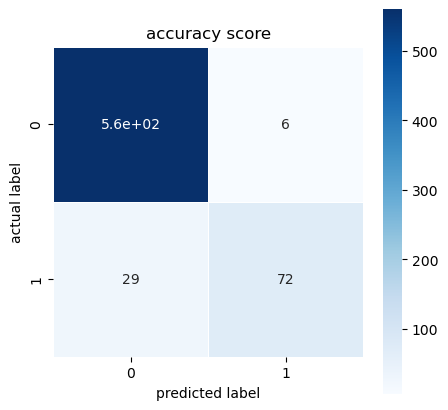

In [17]:
cm=confusion_matrix(y_test,predicted)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5,annot=True,square=True,cmap="Blues")
plt.ylabel("actual label")
plt.xlabel("predicted label")
plt.title("accuracy score")

In [18]:
#for gradient boost classifier
pred = gbc.predict(X_test)
print("classification report - n", classification_report(y_test,pred))

classification report - n               precision    recall  f1-score   support

       False       0.96      0.99      0.97       566
        True       0.90      0.75      0.82       101

    accuracy                           0.95       667
   macro avg       0.93      0.87      0.90       667
weighted avg       0.95      0.95      0.95       667



Text(0.5, 1.0, 'accuracy score')

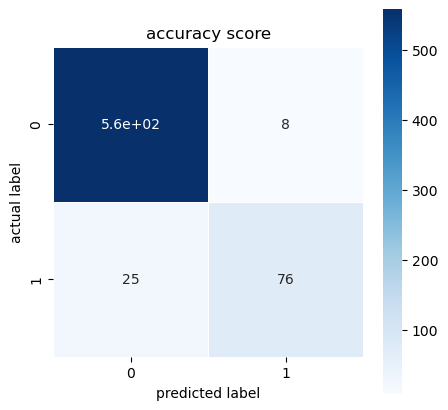

In [19]:
cm=confusion_matrix(y_test,pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5,annot=True,square=True,cmap="Blues")
plt.ylabel("actual label")
plt.xlabel("predicted label")
plt.title("accuracy score")